# Human Factors Prediction Model (LSTM => ASRS + NTSB)

## Import Notebook

In [44]:
%run notebook_model_ls.ipynb
%run notebook_model_lstm.ipynb

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
from sklearn.metrics import f1_score, accuracy_score, hamming_loss

def show_accuracy(model):

    y_true = model.Y_test
    y_pred = model.Y_pred

    accuracy = accuracy_score(y_true, y_pred)

    # code adapted from (F1_Score, n.d.)
    macro_f1_score = f1_score(y_true, y_pred, average='macro')
    micro_f1_score = f1_score(y_true, y_pred, average='micro')
    weighted_f1_score = f1_score(y_true, y_pred, average='weighted')
    # end of adapted code

    hamming_loss_value = hamming_loss(y_true, y_pred)

    print(f'Accuracy: {(accuracy*100):.2f}')
    print(f'Micro F1 Score: {(micro_f1_score*100):.2f}')
    print(f'Macro F1 Score: {(macro_f1_score*100):.2f}')
    print(f'Weighted F1 Score: {(weighted_f1_score*100):.2f}')
    print(f'Hamming Loss: {hamming_loss_value:.4f}')

In [46]:
# 01. Get Data
asrs_df = CoreUtils.get_data('asrs', from_year=2023, to_year=2023)
asrs_df.sort_values(by='date', ascending=False, inplace=True)
asrs_df = asrs_df.head(500)

ntsb_df = CoreUtils.get_data('ntsb', from_year=2018, to_year=2023)
ntsb_df.sort_values(by='date', ascending=False, inplace=True)
ntsb_df = ntsb_df.head(500)

asrs_ntsb_df =  pd.concat([asrs_df, ntsb_df], axis=0).reset_index(drop=True)
asrs_ntsb_df.sort_values(by='date', inplace=True)

ls_version = 1


## ASRS + NTSB + LS(Asrs)

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (1000, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


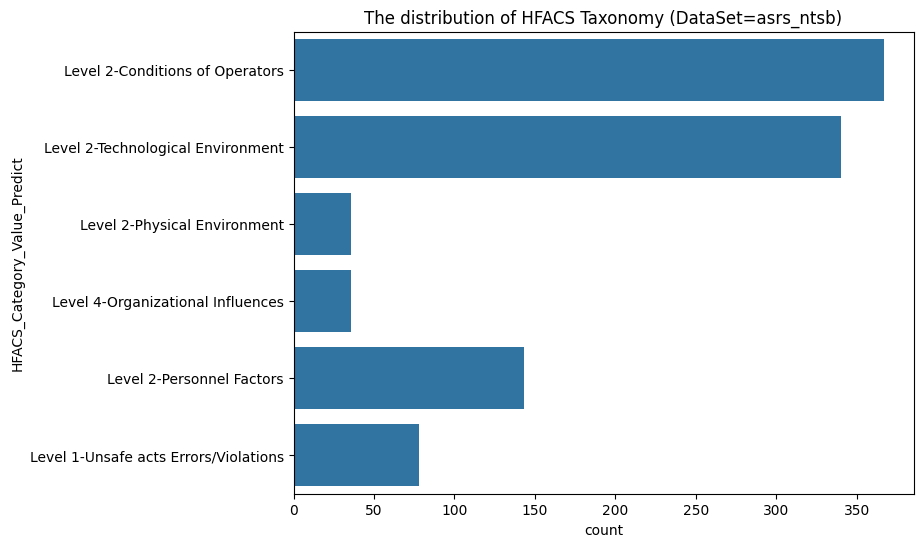

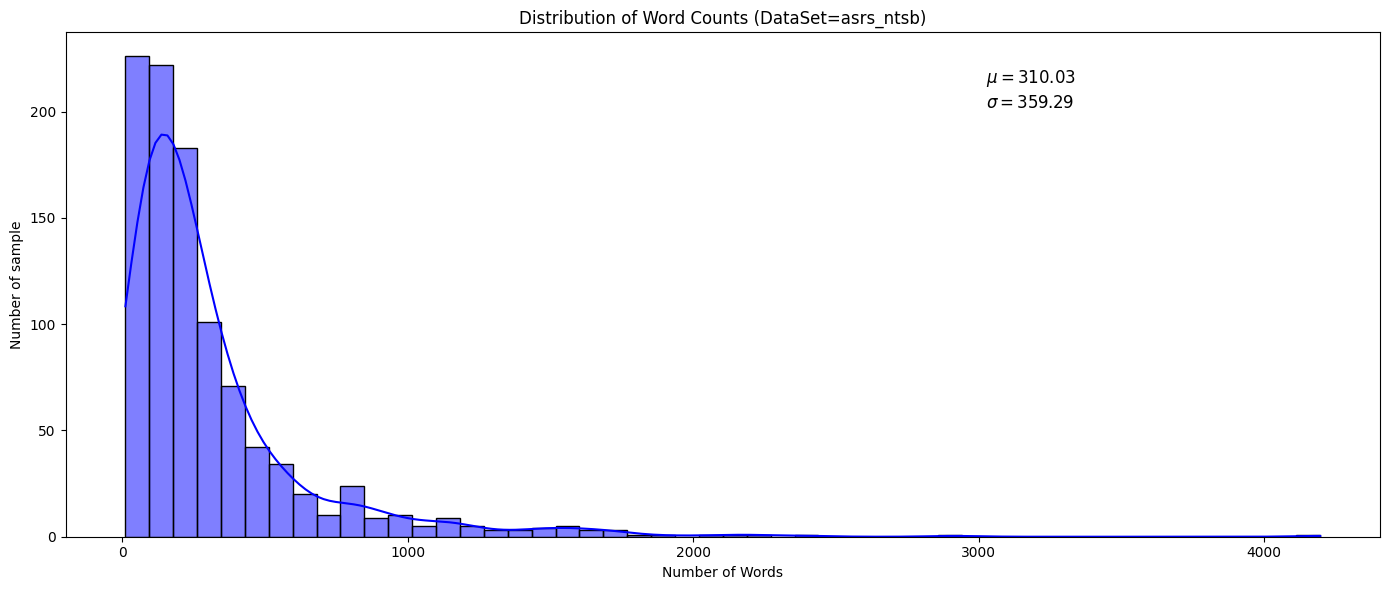

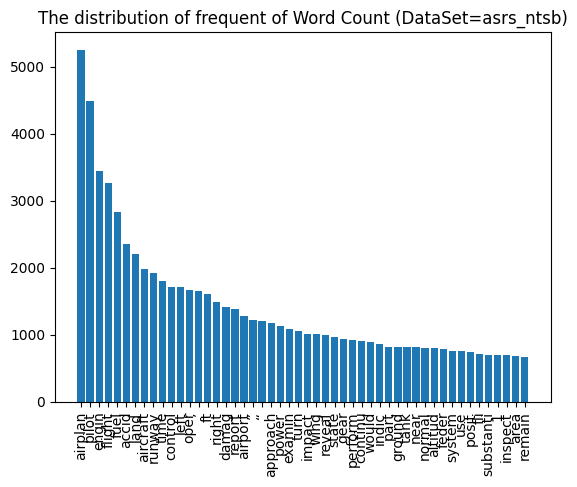

Total unique words: 16135
Define Y
Shape of label tensor: (1000,)
Define X
Found 16136 unique tokens.
Shape of data tensor: (1000, 300)
(800, 300) (800,)
(200, 300) (200,)
4    69
1    68
2    31
0    19
5     8
3     5
Name: count, dtype: int64
1    299
4    271
2    112
0     59
3     31
5     28
Name: count, dtype: int64
Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 337ms/step - accuracy: 0.2332 - loss: 1.7997 - val_accuracy: 0.4000 - val_loss: 1.7857
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 318ms/step - accuracy: 0.3618 - loss: 1.7828 - val_accuracy: 0.3750 - val_loss: 1.7564
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 335ms/step - accuracy: 0.4061 - loss: 1.7439 - val_accuracy: 0.3750 - val_loss: 1.6468
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.3981 - loss: 1.6031 - val_accuracy: 0.3750 - val_loss: 1.3909
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - accuracy: 0.3355 - loss: 1.5129 - val_accuracy: 0.3750 - val_loss: 1.3631
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


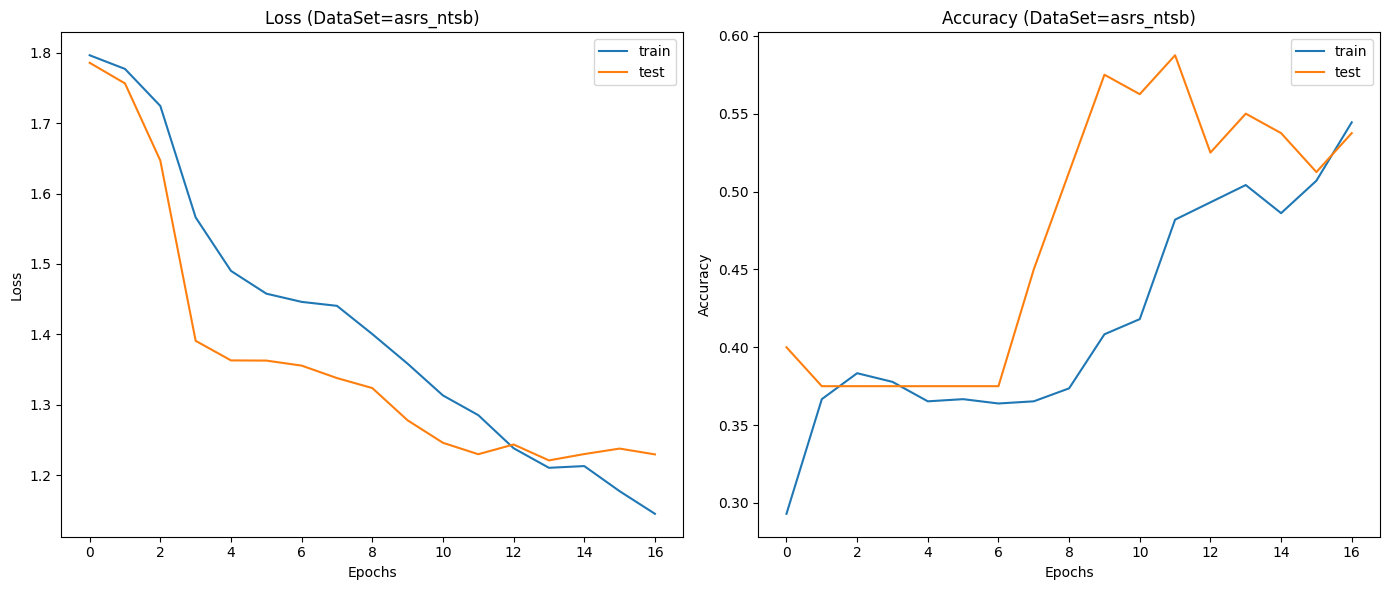

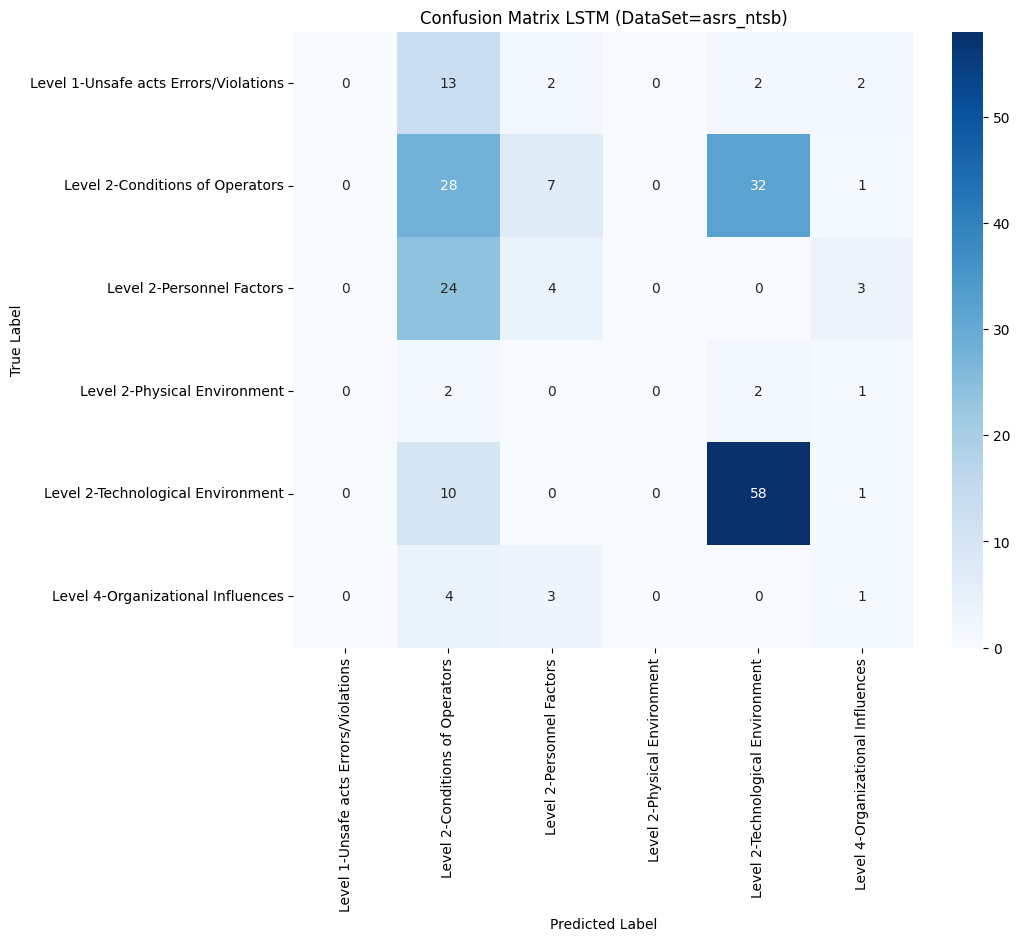

In [47]:
options = {
    "sample_size": 0, 
    "max_length": 300, 
    "max_nb_words": 50000, 
    "is_enable_smote": False,
    "is_enable_class_weight": False,
    "ls_name": 'asrs',
    "ls_version": ls_version
}

# 02. Train Model
dfs = { 'asrs_ntsb': asrs_ntsb_df.copy() }
lstm_ls_asrs_model = LSTMModel(dfs, ds_name='asrs_ntsb', options=options)

class_weights = {
    0: 0.7,  # Lower weight for majority class (Level 1)
    1: 1.0,  # Moderate weight for Level 2 classes
    2: 1.5,  # Higher weight for Level 2 - Personnel Factors
    3: 1.8,  # Further increase for Level 2 - Physical Environment
    4: 0.6,  # Lower weight for Level 2 - Technological Environment (over-represented)
    5: 2.0   # Highest weight for the under-represented class (Level 4)
}
lstm_ls_asrs_model.train(epochs=20, batch_size=32, class_weights_dict=None)

# 02. Evaluate Model
asrs_ntsb_evaluate_result = lstm_ls_asrs_model.evaluate()

## ASRS + NTSB + LS(Ntsb)

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (1000, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


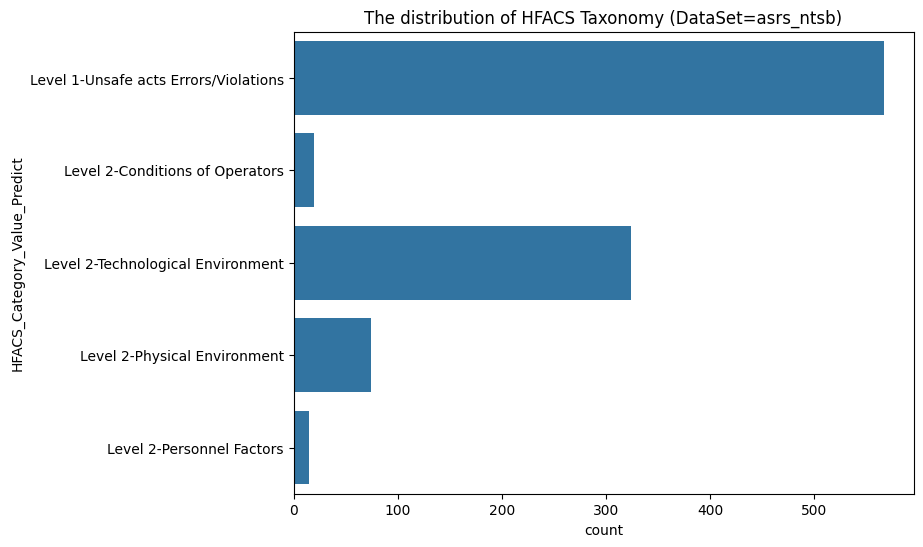

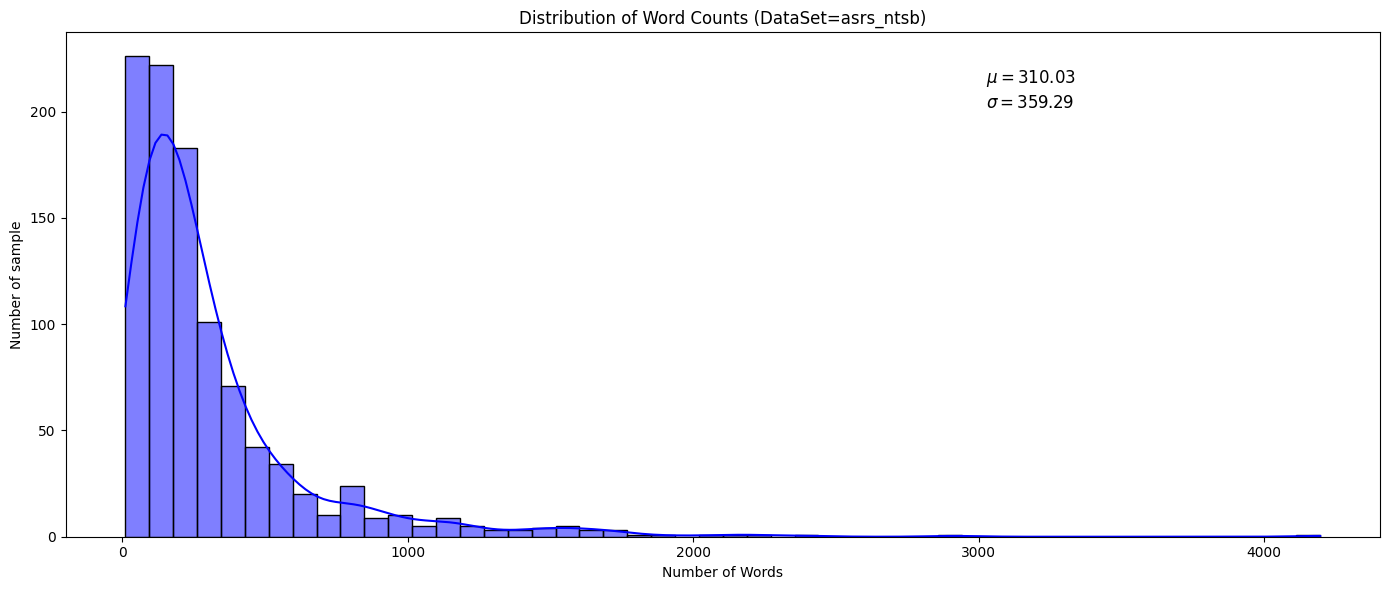

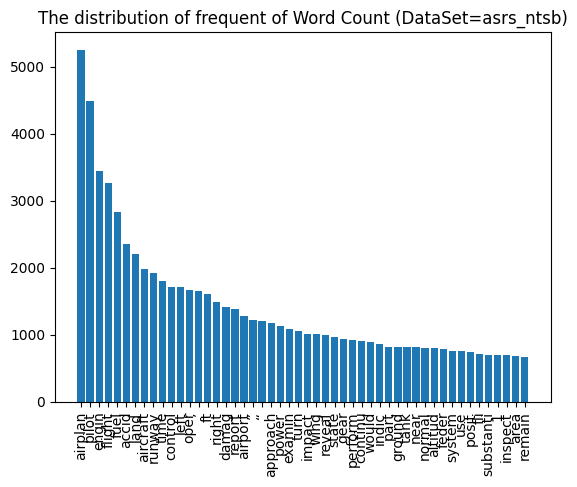

Total unique words: 16135
Define Y
Shape of label tensor: (1000,)
Define X
Found 16136 unique tokens.
Shape of data tensor: (1000, 300)
(800, 300) (800,)
(200, 300) (200,)
0    114
4     68
3     13
1      3
2      2
Name: count, dtype: int64
0    453
4    256
3     61
1     17
2     13
Name: count, dtype: int64
Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 235ms/step - accuracy: 0.3150 - loss: 1.6141 - val_accuracy: 0.5125 - val_loss: 1.5974
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.5725 - loss: 1.5858 - val_accuracy: 0.5125 - val_loss: 1.5504
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - accuracy: 0.5777 - loss: 1.5060 - val_accuracy: 0.5125 - val_loss: 1.3320
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.5717 - loss: 1.2224 - val_accuracy: 0.5125 - val_loss: 1.1072
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 264ms/step - accuracy: 0.5887 - loss: 1.0618 - val_accuracy: 0.5125 - val_loss: 1.0350
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 327m

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step


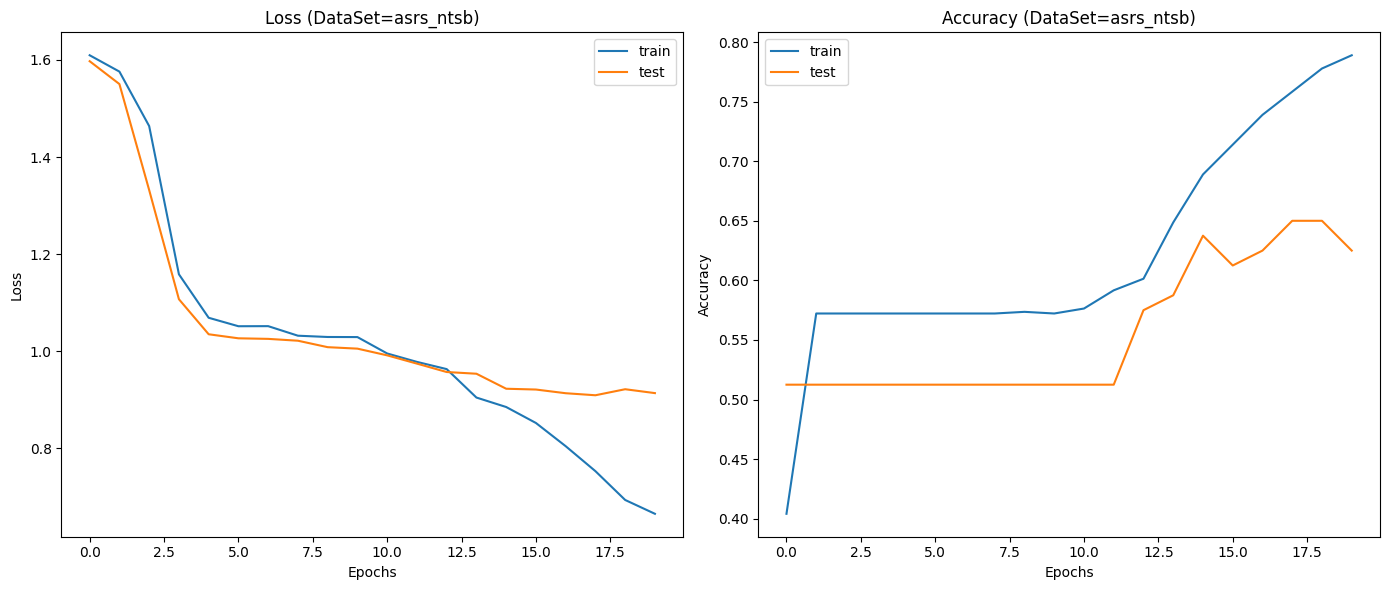

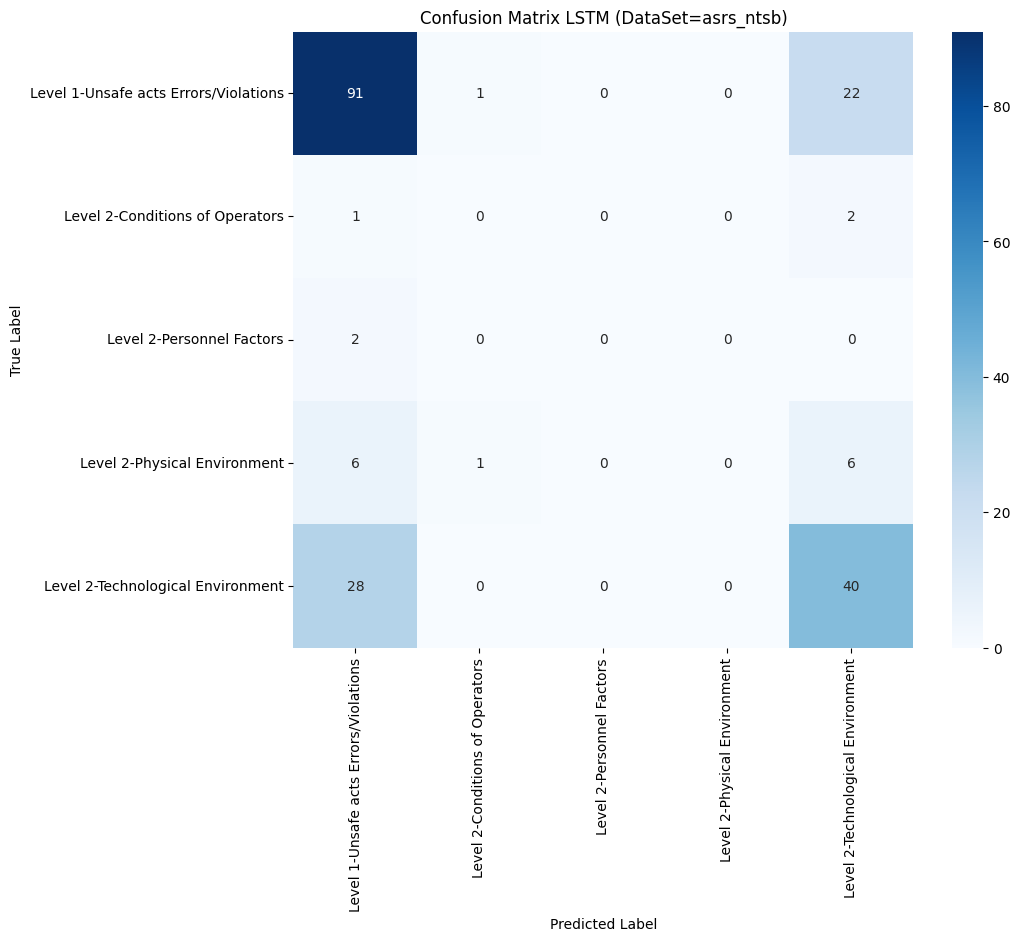

In [48]:
options = {
    "sample_size": 0, 
    "max_length": 300, 
    "max_nb_words": 50000, 
    "is_enable_smote": False,
    "is_enable_class_weight": False,
    "ls_name": 'ntsb',
    "ls_version": ls_version
}

# 02. Train Model
dfs = { 'asrs_ntsb': asrs_ntsb_df.copy() }
lstm_ls_ntsb_model = LSTMModel(dfs, ds_name='asrs_ntsb', options=options)

class_weights = {
    0: 0.7,  # Lower weight for majority class (Level 1)
    1: 1.0,  # Moderate weight for Level 2 classes
    2: 1.5,  # Higher weight for Level 2 - Personnel Factors
    3: 1.8,  # Further increase for Level 2 - Physical Environment
    4: 0.6,  # Lower weight for Level 2 - Technological Environment (over-represented)
    5: 2.0   # Highest weight for the under-represented class (Level 4)
}
lstm_ls_ntsb_model.train(epochs=20, batch_size=32, class_weights_dict=None)

# 02. Evaluate Model
asrs_ntsb_evaluate_result = lstm_ls_ntsb_model.evaluate()

## ASRS + NTSB + LS(Hybrid)

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (1000, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


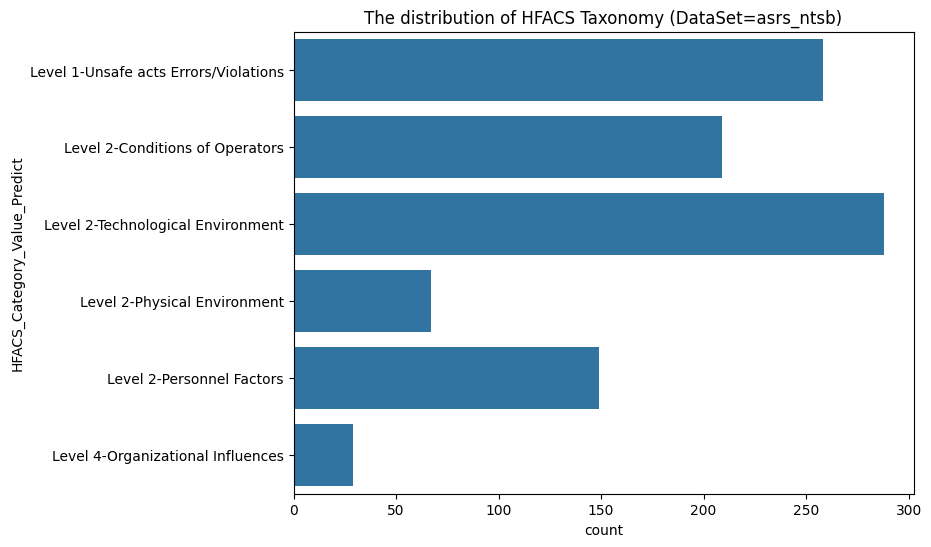

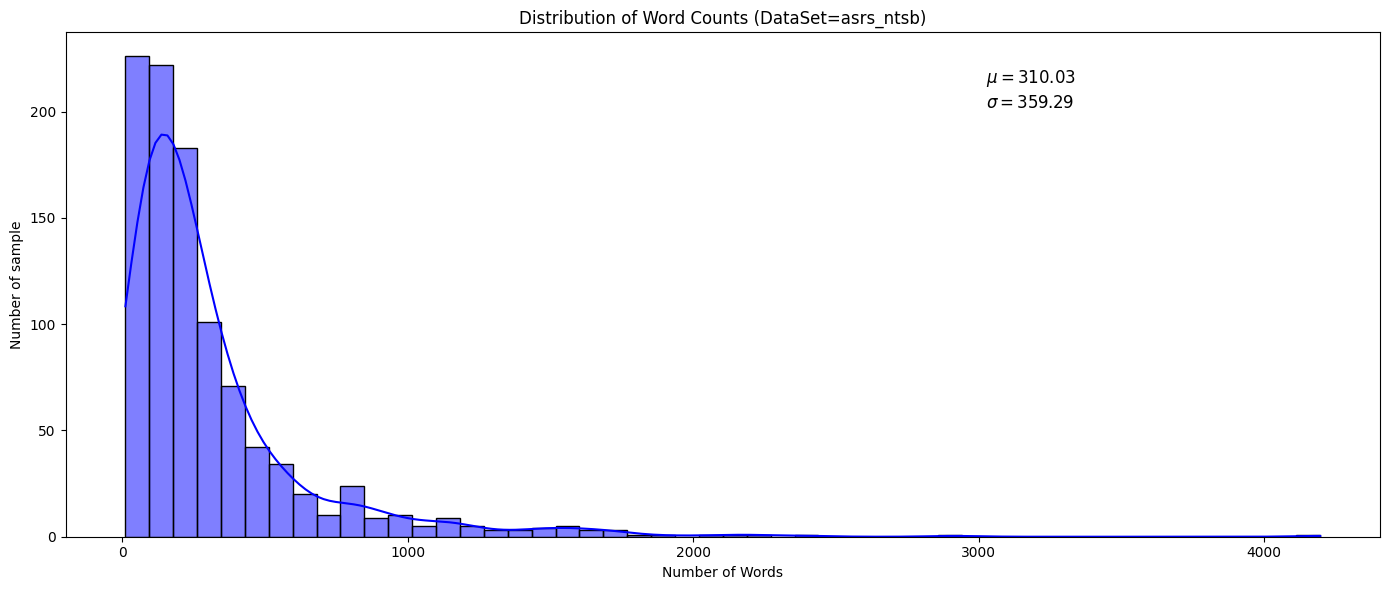

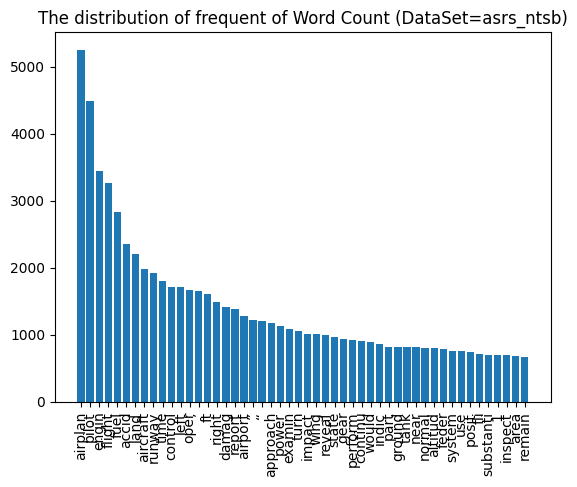

Total unique words: 16135
Define Y
Shape of label tensor: (1000,)
Define X
Found 16136 unique tokens.
Shape of data tensor: (1000, 300)
(800, 300) (800,)
(200, 300) (200,)
4    58
0    52
1    38
2    32
3    12
5     8
Name: count, dtype: int64
4    230
0    206
1    171
2    117
3     55
5     21
Name: count, dtype: int64
Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step - accuracy: 0.1971 - loss: 1.8014 - val_accuracy: 0.3625 - val_loss: 1.7940
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - accuracy: 0.2980 - loss: 1.7906 - val_accuracy: 0.3500 - val_loss: 1.7823
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 298ms/step - accuracy: 0.3121 - loss: 1.7773 - val_accuracy: 0.3500 - val_loss: 1.7600
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.2645 - loss: 1.7483 - val_accuracy: 0.3500 - val_loss: 1.6855
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.3017 - loss: 1.6453 - val_accuracy: 0.3500 - val_loss: 1.6041
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step


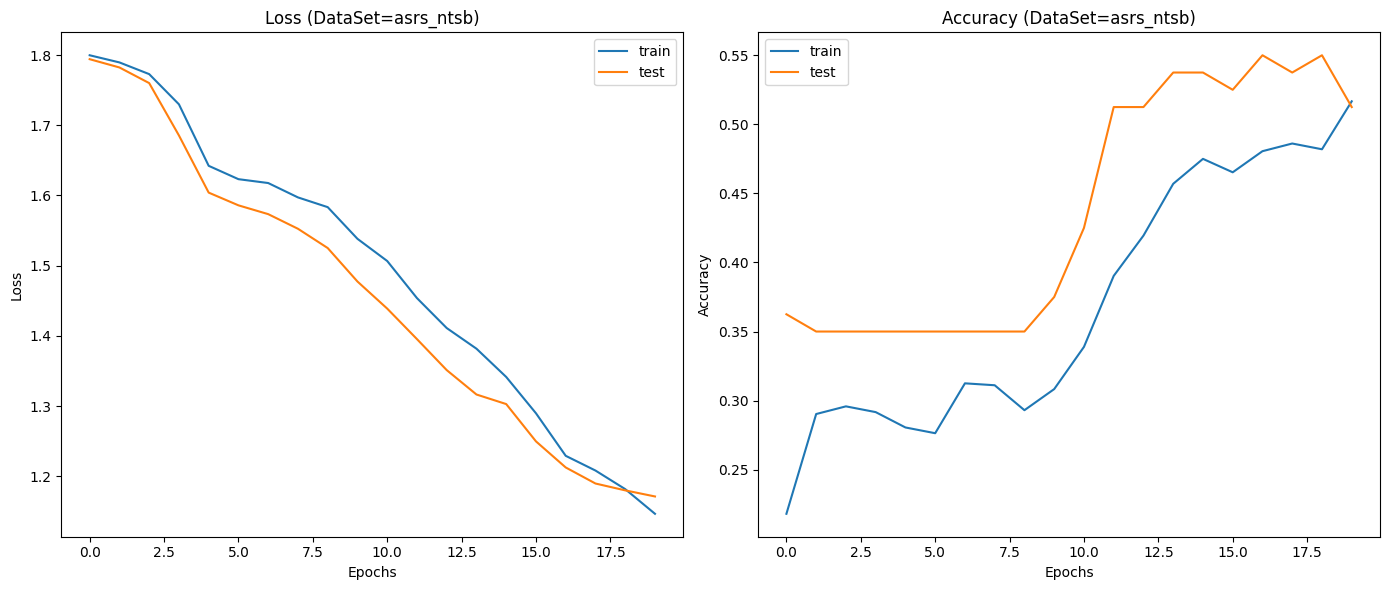

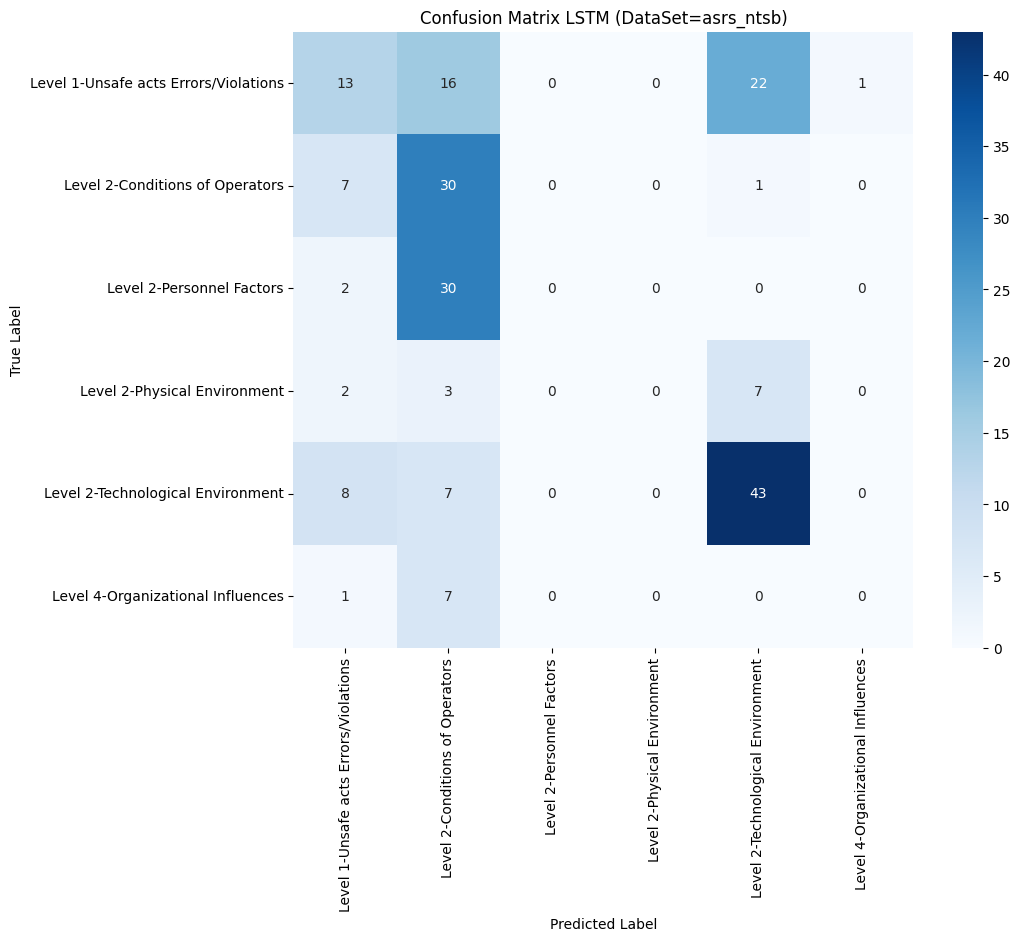

In [49]:
options = {
    "sample_size": 0, 
    "max_length": 300, 
    "max_nb_words": 50000, 
    "is_enable_smote": False,
    "is_enable_class_weight": False,
    "ls_name": 'asrs_ntsb',
    "ls_version": ls_version
}

# 02. Train Model
dfs = { 'asrs_ntsb': asrs_ntsb_df.copy() }
lstm_ls_hybrid_Model = LSTMModel(dfs, ds_name='asrs_ntsb', options=options)

class_weights = {
    0: 0.7,  # Lower weight for majority class (Level 1)
    1: 1.0,  # Moderate weight for Level 2 classes
    2: 1.5,  # Higher weight for Level 2 - Personnel Factors
    3: 1.8,  # Further increase for Level 2 - Physical Environment
    4: 0.6,  # Lower weight for Level 2 - Technological Environment (over-represented)
    5: 2.0   # Highest weight for the under-represented class (Level 4)
}
lstm_ls_hybrid_Model.train(epochs=20, batch_size=32, class_weights_dict=None)

# 02. Evaluate Model
asrs_ntsb_evaluate_result = lstm_ls_hybrid_Model.evaluate()

## Summary of Accuracy

In [50]:
# Show Accuracy
print('ASRS=========')
show_accuracy(lstm_ls_asrs_model)
print('NTSB=========')
show_accuracy(lstm_ls_ntsb_model)
print('ASRS_NTSB=========')
show_accuracy(lstm_ls_hybrid_Model)

ASRS=========
Accuracy: 45.50
Micro F1 Score: 45.50
Macro F1 Score: 22.92
Weighted F1 Score: 40.44
Hamming Loss: 0.5450
NTSB=========
Accuracy: 65.50
Micro F1 Score: 65.50
Macro F1 Score: 26.64
Weighted F1 Score: 62.58
Hamming Loss: 0.3450
ASRS_NTSB=========
Accuracy: 43.00
Micro F1 Score: 43.00
Macro F1 Score: 23.67
Weighted F1 Score: 35.69
Hamming Loss: 0.5700
